# Hello world of computer vision mnist

In [1]:
import numpy as  np
import matplotlib.pyplot as plt
from keras.datasets import mnist
import random
import seaborn as sns 


Using TensorFlow backend.


In [2]:
(xtr,ytr),(xts,yts) = mnist.load_data()

In [3]:
y_true = yts

In [4]:
#plt.imshow(xtr[0])
#plt.title(ytr[0])
#plt.show()

In [5]:
print('xtr shape',xtr.shape,sep=':')
print('ytr shape',ytr.shape,sep=':')


xtr shape:(60000, 28, 28)
ytr shape:(60000,)


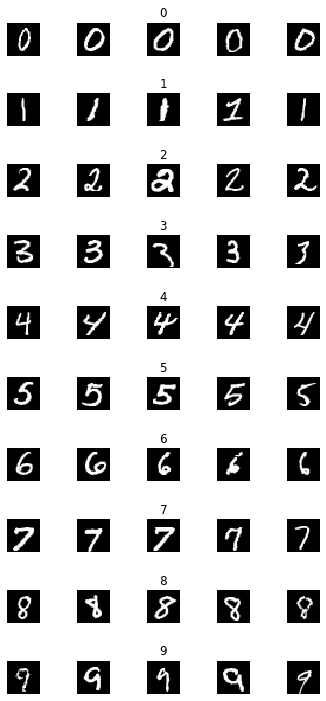

In [6]:
n_cols = 5
n_classes = 10

fig , axes = plt.subplots(nrows=n_classes,ncols=n_cols,figsize=(5,10))
fig.tight_layout()

for i in range(n_cols) :
    for j in range(n_classes):
        images = xtr[ytr==j]
        selected_image = images[random.randint(0,(len(images)-1)),:,:]
        axes[j][i].imshow(selected_image,cmap='gray')
        axes[j][i].axis('off')
        if i == 2 :
            axes[j][i].set_title(str(j))

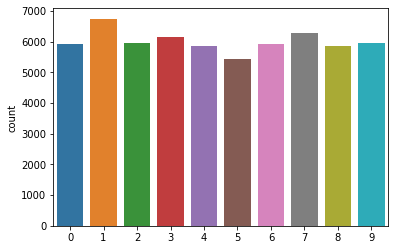

In [7]:
sns.countplot(ytr)
plt.show()

#  Image Augmentation
<br>
creating new images from existing images  
<br>
by distorting them (adding noise , rotate , zoom in zoom out etc)

# Pre - processing  

In [8]:
#n_pixels = xtr.reshape( xtr.shape[0],28,28,1)

xtr = xtr.reshape(xtr.shape[0],28,28,1)
xtr = xtr/255 # brings value b/w 0 and 1


xts = xts.reshape(xts.shape[0],28,28,1)
xts = xts/255 




# onehotEncoding ytr array

In [9]:
from keras.utils.np_utils import to_categorical
ytr = to_categorical(ytr,10)
yts = to_categorical(yts,10)

# creating neural model

In [10]:
from keras.models import Sequential
from keras.layers import Dense , Flatten
from keras.layers.convolutional import Conv2D , MaxPooling2D
from keras.optimizers import Adam


In [20]:
def create_model() :
    model = Sequential()
    model.add(Conv2D(32,kernel_size=(5,5),input_shape=(28,28,1) , activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Flatten())
    model.add(Dense(256,activation='relu'))
    model.add(Dense(10,activation = 'softmax'))
    model.compile(Adam(lr=0.01),loss = 'categorical_crossentropy',metrics=['accuracy'])
 

    return model

model = create_model()
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               1179904   
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
Total params: 1,183,306
Trainable params: 1,183,306
Non-trainable params: 0
_________________________________________________________________
None


In [21]:
h = model.fit(xtr,ytr,epochs=2,verbose=1,validation_data=(xts,yts))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 46s 767us/step - loss: 0.1394 - accuracy: 0.9599 - val_loss: 0.1314 - val_accuracy: 0.9580
Epoch 2/2
60000/60000 [==============================] - 44s 742us/step - loss: 0.0878 - accuracy: 0.9763 - val_loss: 0.1086 - val_accuracy: 0.9737


In [13]:
# to save the model trained in .h5 using tensorflow
model.save('model.h5')

#  Predicting images

In [22]:
import cv2
img = cv2.imread(r"D:\Datasets\digit.png")

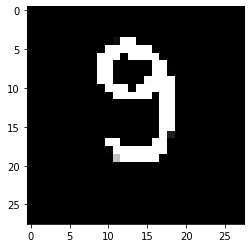

In [23]:
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = cv2.resize(img,(28,28))
plt.imshow(img,cmap='gray')
plt.show()

In [24]:

img = img.reshape(1,28,28,1)
img = img/255
model.predict_classes(img)

array([4], dtype=int64)

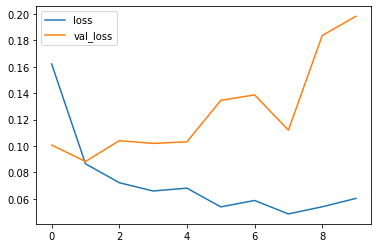

In [19]:
plt.plot(h.history['loss'],label='loss')
plt.plot(h.history['val_loss'],label = 'val_loss')
plt.legend()
plt.show()

# to download file from colab <br>
model.save('ddjdj.h5')<br>
from google colab import filer<br>
filer.download('ddjdj.h5')

#  Image Augmentation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=10,zoom_range=0.1,shear_range=0.1,width_shift_range=0.1,height_shift_range=0.1,brightness_range=(0.1,1))



In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict_classes(xts)
print(confusion_matrix(y_true,y_pred))